
File Name : CrimeDataAnalysis_Part_2.ipynb

Author : S.Srihari

Date : 12-18-18



In [1]:
import os
import pandas as pd

from DataExtractor import DataExtractor
from DataUtils import *
from VizTools import *

In [2]:
# Set the path variables
_path = os.path.join(os.getcwd(), "datasets/crime")

db = 'crime_data'
year = 2017
query = "SELECT * FROM crime_" + str(year) + " LIMIT 500;"

data_extractor = DataExtractor()
crime_df = data_extractor.read_db(db=db, query=query)

print_columns(crime_df)

Dataframe columns :
	 ID	 Date	 Block	 IUCR	 Primary Type	 Description	 Location Description	 Arrest	 Domestic	 Beat	 District	 Ward	 Community Area	 FBI Code	 X Coordinate	 Y Coordinate	 Year	 Location	 month	 day	 quarter	 week_no	 crime_count

In [3]:
# Clean the data and prep it for visualisation
print(crime_df.shape)
crime_df = clean_data(crime_df)
print(crime_df.shape)

print_columns(crime_df)


(500, 23)
Number of duplicate IDs  0
(458, 23)
Dataframe columns :
	 ID	 Date	 Block	 IUCR	 Primary Type	 Description	 Location Description	 Arrest	 Domestic	 Beat	 District	 Ward	 Community Area	 FBI Code	 X Coordinate	 Y Coordinate	 Year	 Location	 month	 day	 quarter	 week_no	 crime_count

Use the pareto principle to decide which crimes contribute towards 20% of all distribtions

In [5]:
# Group by crimes and get total count
crime_groups = crime_df.groupby(by="Primary Type", as_index=False).sum()

# Sort and get the cdf
crime_groups.sort_values(["crime_count"],
                         inplace=True,
                         ascending=False)
# Reset the index
crime_groups = crime_groups.reset_index(drop=True)
crime_groups

,Primary Type,ID,Arrest,Domestic,Beat,X Coordinate,Y Coordinate,Year,month,day,quarter,week_no,crime_count
0,BATTERY,1308234633,30,63,156898,140822280.0,228800935.0,244057,121,121,0,6292,121
1,THEFT,736213735,3,4,82686,79446051.0,128207147.0,137156,68,68,0,3536,68
2,CRIMINAL DAMAGE,626759784,3,4,63377,67473504.0,108756741.0,116986,58,58,0,3016,58
3,OFFENSE INVOLVING CHILDREN,562901637,4,6,61301,59317257.0,96064530.0,102867,51,51,0,2652,51
4,DECEPTIVE PRACTICE,436619719,3,1,62940,46593599.0,75814147.0,80680,40,40,0,2080,40
5,OTHER OFFENSE,271714838,3,15,23306,29253826.0,46989105.0,50425,25,25,0,1300,25
6,CRIM SEXUAL ASSAULT,218227731,3,1,18271,23383264.0,37698728.0,40340,20,20,0,1040,20
7,ROBBERY,162036235,2,1,22831,17439167.0,28559965.0,30255,15,15,0,780,15
8,SEX OFFENSE,132139373,1,2,12150,13958482.0,22358028.0,24204,12,12,0,624,12
9,ASSAULT,118823419,3,4,13358,12825454.0,20657898.0,22187,11,11,0,572,11


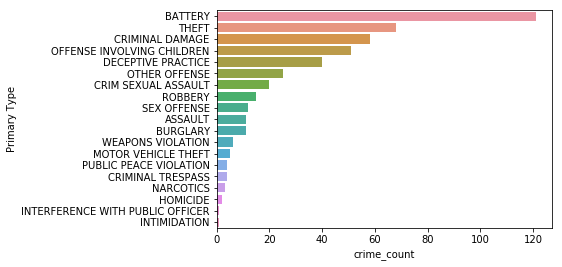

In [8]:
crime_groups = crime_groups[["Primary Type", "Arrest", "crime_count"]]
crime_groups["crime_count_cdf"] = crime_groups[["crime_count"]].cumsum()[["crime_count"]]/crime_df.shape[0]

plot_bar(df=crime_groups,
         y="Primary Type",
         x="crime_count")


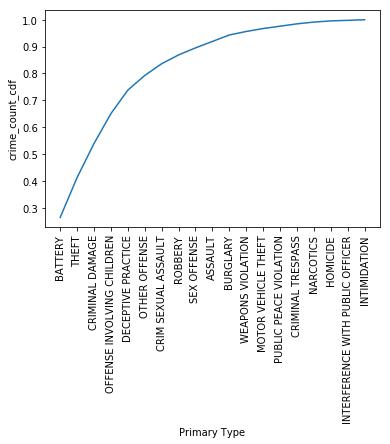

In [9]:
# Crimes to monitor
cut_off_cdf = 0.8
plot_line(y="crime_count_cdf", x="Primary Type", df=crime_groups, xrot=90)


In [10]:
# Find the cdf value that is closest to the cut off value
idx = crime_groups.loc[(crime_groups['crime_count_cdf']-cut_off_cdf).abs() ==
                       (crime_groups['crime_count_cdf']-cut_off_cdf).abs().min()].index.values[0]

crime_groups_subset = crime_groups.iloc[:idx+1, :]
crime_groups_subset

,Primary Type,Arrest,crime_count,crime_count_cdf
0,BATTERY,30,121,0.264192
1,THEFT,3,68,0.412664
2,CRIMINAL DAMAGE,3,58,0.539301
3,OFFENSE INVOLVING CHILDREN,4,51,0.650655
4,DECEPTIVE PRACTICE,3,40,0.737991
5,OTHER OFFENSE,3,25,0.792576
